In [27]:
import numpy as np
import math
import matplotlib.pyplot as plt

import lmfit
from lmfit import Parameters, minimize
from lmfit.printfuncs import report_fit

# Linear model fitting

In [49]:
## Blood Pressure data
x = [22, 41, 52, 23, 41, 54, 24, 46, 56, 27, 47, 57, 28, 48, 58,  9, 
     49, 59, 30, 49, 63, 32, 50, 67, 33, 51, 71, 35, 51, 77, 40, 51, 81]
y = [131, 139, 128, 128, 171, 105, 116, 137, 145, 106, 111, 141, 114, 
     115, 153, 123, 133, 157, 117, 128, 155, 122, 183,
     176,  99, 130, 172, 121, 133, 178, 147, 144, 217] 
x = np.asarray(x, np.float32) 
y = np.asarray(y, np.float32) 

In [3]:
def linModel(pars, x, data=None):

    model = pars['a'] * x + pars['b']
    
    if data is None:
        return model
    
    return model - data


fit_params = Parameters()
fit_params.add('a', value=3., max=10000., min=-10000.)
fit_params.add('b', value=2., max=10000.,min=-10000.)

model = minimize(linModel, fit_params, args=(x,), kws={'data': y})
predictions = linModel(model.params, x)
report_fit(model)


[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10
    # data points      = 33
    # variables        = 2
    chi-square         = 11523.629
    reduced chi-square = 371.729965
    Akaike info crit   = 197.236362
    Bayesian info crit = 200.229377
[[Variables]]
    a:  1.10505712 +/- 0.20604765 (18.65%) (init = 3)
    b:  87.6698357 +/- 10.0795388 (11.50%) (init = 2)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.943


intercept =  1.105057123264487 solpe =  87.66983567201896
intercept error =  0.20604765094263033 solpe error=  10.079538847459538
chi squared =  11523.629
reduced chi squared = chi squared/(data_points - number_of_parameters) =  371.72996471774195


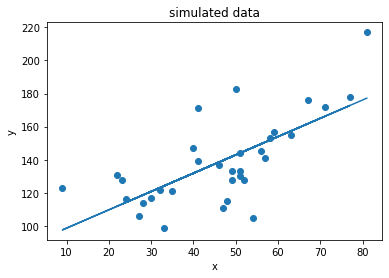

In [4]:
print("intercept = ",model.params['a'].value,"solpe = ", model.params['b'].value)
print("intercept error = ",model.params['a'].stderr,"solpe error= ", model.params['b'].stderr)
print('chi squared = ',model.chisqr)
print('reduced chi squared = chi squared/(data_points - number_of_parameters) = ',model.redchi)

plt.scatter(x=x,y=y)
plt.title("simulated data")
plt.xlabel("x")
plt.ylabel("y")

plt.plot(x, predictions)

plt.show()


$$
  grad_a = \frac{\partial}{\partial a}\frac{1}{n}\sum_{i=1}^n(a x_i + b - y_i)^2 = \frac{2}{n}\sum_{i=1}^n(a x_i + b - y_i) x_i 
$$


$$
  grad_b = \frac{\partial}{\partial b}\frac{1}{n}\sum_{i=1}^n(a x_i + b - y_i)^2 = \frac{2}{n}\sum_{i=1}^n(a x_i + b - y_i)  
$$

In [5]:
def grad(a,b):
    y_hat = a*x + b
    n2 = 2.0 / len(x)
    return n2*np.sum((y_hat - y)*x) , n2*np.sum((y_hat - y))


def loss(a,b):
    return 1/len(y)*(np.sum((a*x + b - y)**2))

eta = 0.0001
a_ = 5
b_ = 5
loss_ = loss(a_,b_)
a_history = a_
b_history = b_
loss_history= loss_
for i in range(2000000):
    if i%100000==0:
        grad_a, grad_b  = grad(a_,b_)
        a_ = a_ - eta * grad_a
        b_ = b_ - eta * grad_b
        loss_= loss(a_,b_)
        a_history =np.append(a_history,a_) 
        b_history =np.append(b_history,b_) 
        loss_history =np.append(loss_history,loss_) 
        print("a = ", a_, "b = ", b_, "gard_a = ", grad_a, "gard_b = ", grad_b, "loss = ", loss_)

a =  3.898751515151515 b =  4.9806060606060605 gard_a =  11012.484848484848 gard_b =  193.93939393939394 loss =  4551.628787878788
a =  3.3246526515151515 b =  4.971374183238637 gard_a =  5740.988636363637 gard_b =  92.31877367424242 loss =  2043.9483901515152
a =  3.0253574337121214 b =  4.967439779015744 gard_a =  2992.952178030303 gard_b =  39.34404222892992 loss =  1362.4498106060607
a =  2.8693176491477272 b =  4.966266933371805 gard_a =  1560.3978456439395 gard_b =  11.72845643939394 loss =  1177.2244318181818
a =  2.7879571141098483 b =  4.966533672679555 gard_a =  813.6053503787879 gard_b =  -2.6673930775035513 loss =  1126.8648200757575
a =  2.7455267045454543 b =  4.9675508450132435 gard_a =  424.30409564393943 gard_b =  -10.17172333688447 loss =  1113.154356060606
a =  2.723390830669981 b =  4.968959203592937 gard_a =  221.35873875473484 gard_b =  -14.083585796934186 loss =  1109.404356060606
a =  2.711834444543087 b =  4.970571467220423 gard_a =  115.56386126893939 gard_b =

# Keras model fitting

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import optimizers

In [7]:

model = Sequential()

model.add(Dense(1,input_dim=1))
model.add(Activation('linear'))
opt = optimizers.SGD(lr=0.0004)

model.compile(loss='mean_squared_error',optimizer=opt)

In [8]:
w = model.get_weights()
print(w)

model.summary()

[array([[0.7361063]], dtype=float32), array([0.], dtype=float32)]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [9]:
a=np.array(0,dtype="float32",ndmin=2)
b=np.array(139,dtype="float32",ndmin=1)
print(a,b)

[[0.]] [139.]


In [10]:
model.set_weights([a,b])
model.evaluate(x,y,verbose=2)

2/2 - 0s - loss: 673.4545


673.4545288085938

In [62]:
for i in range(0,int(80000/5000)):
    model.fit(x=x,y=y,batch_size=33,epochs=5000,verbose = 0)
    a,b=model.get_weights()
    mse=np.mean(np.square(model.predict(x).reshape(len(x),)-y))
    print("Epoch:",i*5000+5000,"slope=",a[0][0],"intercept=",b[0],"MSE=",mse)

Epoch: 5000 slope= 0.47003523 intercept= 120.61076 MSE= 469.57272
Epoch: 10000 slope= 0.6975451 intercept= 108.80889 MSE= 398.76883
Epoch: 15000 slope= 0.84354 intercept= 101.23554 MSE= 369.61255
Epoch: 20000 slope= 0.93722606 intercept= 96.37567 MSE= 357.60617
Epoch: 25000 slope= 0.9973445 intercept= 93.25709 MSE= 352.66223
Epoch: 30000 slope= 1.0359242 intercept= 91.25578 MSE= 350.62625
Epoch: 35000 slope= 1.0606792 intercept= 89.97166 MSE= 349.7879
Epoch: 40000 slope= 1.076562 intercept= 89.14775 MSE= 349.4427
Epoch: 45000 slope= 1.0867506 intercept= 88.61922 MSE= 349.30048
Epoch: 50000 slope= 1.093286 intercept= 88.280205 MSE= 349.242
Epoch: 55000 slope= 1.0975139 intercept= 88.06088 MSE= 349.21765
Epoch: 60000 slope= 1.1001546 intercept= 87.9239 MSE= 349.20795
Epoch: 65000 slope= 1.1018678 intercept= 87.83504 MSE= 349.20386
Epoch: 70000 slope= 1.1029379 intercept= 87.77952 MSE= 349.20215
Epoch: 75000 slope= 1.1036732 intercept= 87.74137 MSE= 349.2014
Epoch: 80000 slope= 1.1041985 

# Predicting uncertainties

In [17]:
def create_sine_data(n = 300):
    np.random.seed(32)
    n = 300
    x = np.linspace(0,1*2*np.pi,n)
    y1 = 3*np.sin(x)
    y1 = np.concatenate((np.zeros(60), y1+np.random.normal(0,0.15*np.abs(y1),n),np.zeros(60)))
    x=np.concatenate((np.linspace(-3,0,60),np.linspace(0,3*2*np.pi,n),np.linspace(3*2*np.pi,3*2*np.pi+3,60)))
    y2 = 0.1*x+1
    y=y1+y2
    return x,y

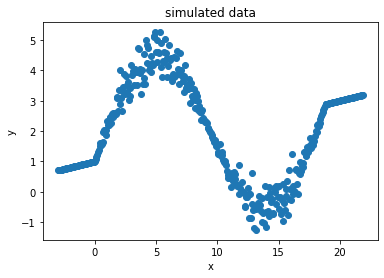

In [18]:
x,y = create_sine_data(n=300) #A
plt.scatter(x=x,y=y,marker='o')
plt.title("simulated data")
plt.xlabel("x")
plt.ylabel("y")
n=len(x)

In [29]:
model = Sequential()
model.add(Dense(20, activation='relu',
                batch_input_shape=(None, 1)))
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error',optimizer="adam")

In [30]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 20)                40        
_________________________________________________________________
dense_14 (Dense)             (None, 50)                1050      
_________________________________________________________________
dense_15 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 21        
Total params: 2,131
Trainable params: 2,131
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(x, y, 
                  batch_size=16, 
                  epochs=1000,
                  verbose=True, 
                 )

2/2 - 0s - loss: 772.6802


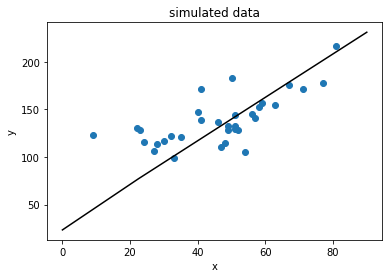

In [33]:
# evaluation of the MSE loss
model.evaluate(x,y,verbose=2)

# show the data along with the fit
plt.scatter(x=x,y=y,marker='o')
plt.plot(np.linspace(0,90,5),model.predict(np.linspace(0,90,5)),c="black")
plt.title("simulated data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


In [34]:
import tensorflow as tf
import math

def my_NLL_loss(y_true,y_pred):
    mu=tf.slice(y_pred,[0,0],[-1,1])              # A     
    sigma=tf.math.exp(tf.slice(y_pred,[0,1],[-1,1]))   # B 

    a=1/(tf.sqrt(2.*math.pi)*sigma) 
    b1=tf.square(mu-y_true)
    b2=2*tf.square(sigma)
    b=b1/b2

    loss = tf.reduce_sum(-tf.math.log(a)+b,axis=0)
    return loss

#A extract first column for μ 
#B extract second column for σ

In [35]:
model =  Sequential()
model.add(Dense(20, activation='relu',batch_input_shape=(None, 1)))
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation='linear'))

model.compile(loss=my_NLL_loss,optimizer="adam",metrics=[my_NLL_loss])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 20)                40        
_________________________________________________________________
dense_18 (Dense)             (None, 50)                1050      
_________________________________________________________________
dense_19 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 42        
Total params: 2,152
Trainable params: 2,152
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(x, y, 
                  batch_size=16, 
                  epochs=1000,
                  verbose=True
                 )

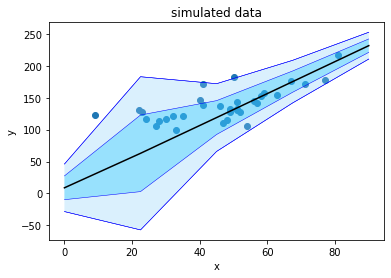

In [37]:
x_pred=np.linspace(0,90,5).reshape(-1,1)
pred_mu=model.predict(np.linspace(0,90,5).reshape(-1,1))[:,0]
pred_log_sigma=model.predict(np.linspace(0,90,5).reshape(-1,1))[:,1]
plt.scatter(x,y,marker='o')
plt.plot(x_pred,pred_mu,c="black")

pred_1_sd_p = pred_mu+(np.exp(pred_log_sigma))
pred_1_sd_m = pred_mu-(np.exp(pred_log_sigma))

plt.plot(x_pred,pred_1_sd_p, 'b', linewidth=0.5)
plt.plot(x_pred,pred_1_sd_m, 'b', linewidth=0.5)

pred_2_sd_p = pred_mu+2*(np.exp(pred_log_sigma))
pred_2_sd_m = pred_mu-2*(np.exp(pred_log_sigma))

plt.plot(x_pred,pred_2_sd_p, 'b', linewidth=0.5)
plt.plot(x_pred,pred_2_sd_m, 'b', linewidth=0.5)

plt.plot(x_pred,pred_mu+2*(np.exp(pred_log_sigma)), 'b', linewidth=0.5)
plt.plot(x_pred,pred_mu-2*(np.exp(pred_log_sigma)), 'b', linewidth=0.5)

plt.fill(np.concatenate([x_pred, x_pred[::-1]]),
         np.concatenate([pred_2_sd_p,
                         pred_2_sd_m[::-1]]),alpha=0.3, fc='lightskyblue', ec='None')
plt.fill(np.concatenate([x_pred, x_pred[::-1]]),
         np.concatenate([pred_1_sd_p,
                         pred_1_sd_m[::-1]]),alpha=0.3, fc='deepskyblue', ec='None')
plt.title("simulated data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()